<a href="https://colab.research.google.com/github/Mir-Safwan-Marzouq/Deep-Learning/blob/main/1_Digit%20Classification/Hand_Written_Digit_Classification_Keras_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [27]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()  #handwritten digits dataset can be load using this line
# load train and test datasets into these variables

In [28]:
len(X_train)

60000

In [29]:
len(X_test)

10000

In [30]:
X_train[0].shape # each sample is 28 by 28 pixel image

(28, 28)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

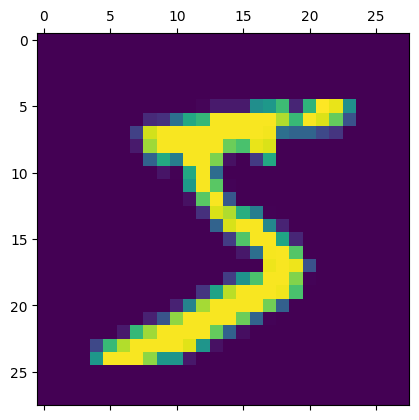

In [32]:
plt.matshow(X_train[0])

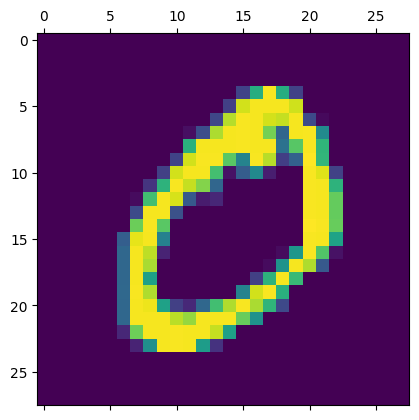

In [33]:
plt.matshow(X_train[1])

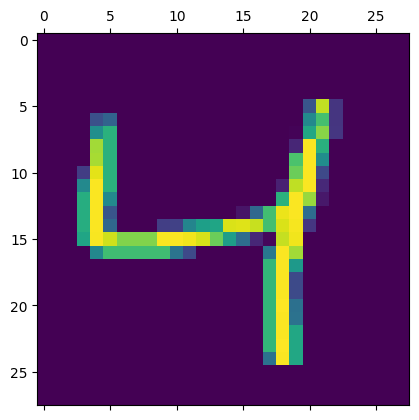

In [34]:
plt.matshow(X_train[2])

In [35]:
y_train[2]

4

In [36]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
# we are going to flatten our training dataset 
# a function called reshape with 2 dimenstion
X_train = X_train/255
X_test = X_test/255
X_train.shape
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [38]:
# first dimension is number of sample you have, 2nd and 3rd dimension is each individual image
# in reshape we want is 60000 and 2nd dimension should be 784

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
X_train_flattened.shape

(60000, 784)

In [40]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [41]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Until now all the code we wrote is extremely simple

In [43]:
# we are going to create a simple neural network
# input layer with 784 elements output layer with 10 elements
# sequential means I am having a stack of layers in my neural network
# since it is a stack, it will accept every layer as one element

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer= 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']      
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4700 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9262


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.9235


[0.27162057161331177, 0.9235000014305115]

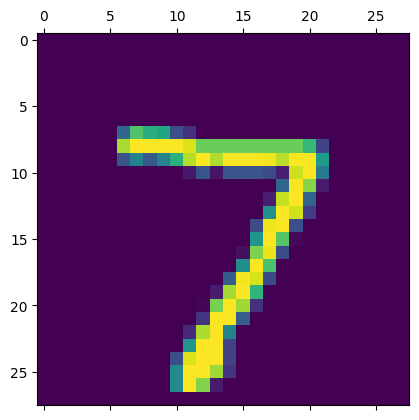

In [45]:
plt.matshow(X_test[0])

In [46]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [47]:
y_predicted[0]

array([1.3541292e-02, 2.1252147e-07, 6.3212082e-02, 9.6172875e-01,
       1.6173528e-03, 1.2948425e-01, 1.5003324e-06, 9.9976921e-01,
       1.1357334e-01, 7.3794049e-01], dtype=float32)

In [48]:
np.argmax(y_predicted[0])

7

In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    2,    0,    5,   11,    2,    3,    1],
       [   0, 1107,    3,    2,    0,    2,    4,    2,   15,    0],
       [   6,    9,  911,   24,    7,    5,   14,    9,   40,    7],
       [   1,    0,   12,  935,    0,   21,    2,    8,   19,   12],
       [   1,    1,    2,    2,  886,    0,   14,    4,    9,   63],
       [   7,    1,    2,   35,    7,  783,   14,    3,   30,   10],
       [   8,    3,    2,    2,    7,   14,  917,    2,    3,    0],
       [   1,    5,   21,   10,    4,    1,    0,  929,    3,   54],
       [   4,    5,    6,   23,    9,   31,   10,    7,  865,   14],
       [  10,    6,    1,   11,   14,    7,    0,    7,    6,  947]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

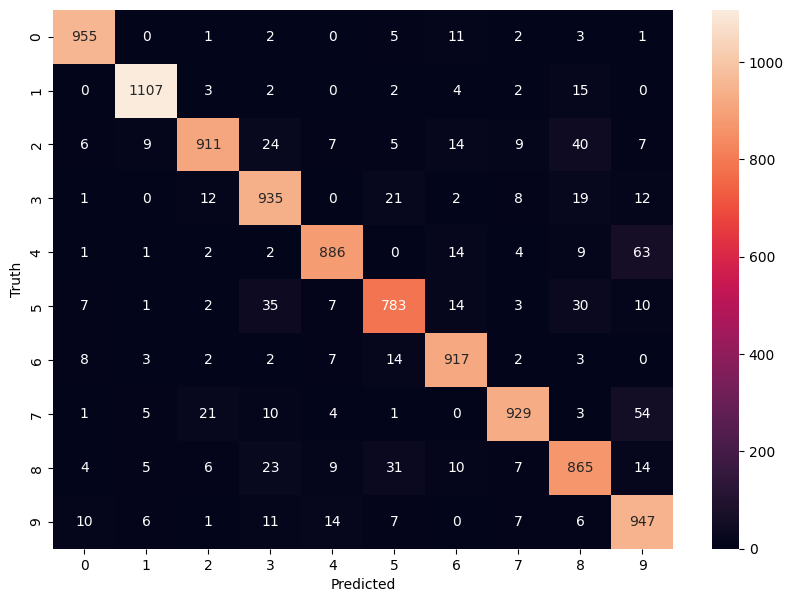

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') # my last layer doesn't need input shape
]) 

model.compile(
    optimizer= 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']      
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2703 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1226 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9847


In [56]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0686 - accuracy: 0.9792


[0.06856489926576614, 0.979200005531311]

In [58]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 4ms/step


In [59]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [60]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    0,    1,    5,    1,    3,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    0,    3,    0],
       [   1,    0, 1013,    0,    3,    0,    2,    6,    7,    0],
       [   0,    0,    8,  982,    1,    9,    0,    4,    6,    0],
       [   0,    0,    6,    0,  959,    0,    2,    1,    1,   13],
       [   2,    0,    0,    4,    2,  872,    5,    1,    3,    3],
       [   3,    3,    2,    1,    5,    3,  937,    0,    4,    0],
       [   0,    5,    9,    3,    1,    0,    0, 1002,    1,    7],
       [   3,    0,    4,    2,    5,    3,    1,    6,  948,    2],
       [   2,    2,    0,    1,    9,    3,    0,    4,    2,  986]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

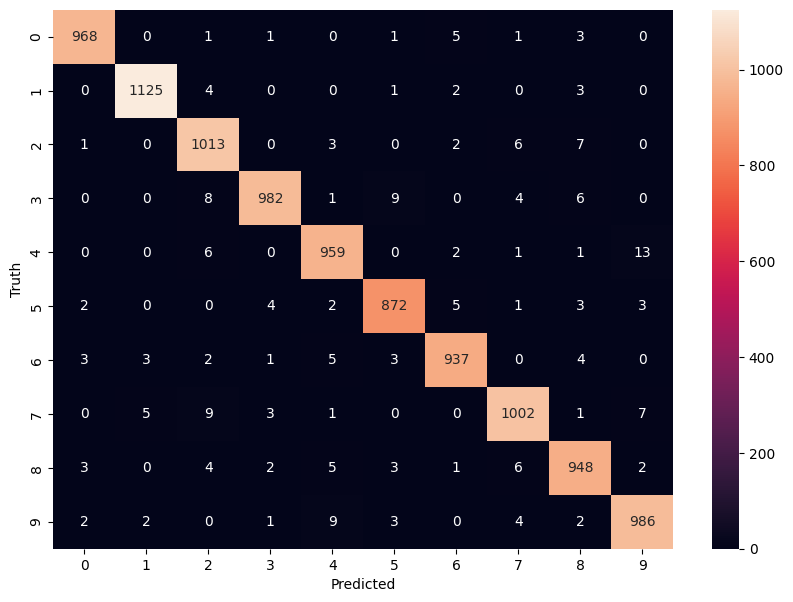

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') # my last layer doesn't need input shape
]) 

model.compile(
    optimizer= 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']      
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2696 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0856 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9838
